In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Preprocessing

## Load raw data

In [2]:
df = pd.read_csv('data/cleaned.csv')
df.head(5)

,tconst,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,tt2077677,3Simoa,2012.0,6.4,370,"A caper comedy about two friends, Simo and Las...",Comedy,Finland,Finnish,334784.0,93296,86,Teemu Nikki,"Olli Rahkonen,Paula Vesala,Rami Rusinen"
1,tt0106332,Ba wang bie ji,1993.0,8.1,24830,"""Farewell, My Concubine"" is a movie with two p...","Drama,Music,Romance","China,Hong Kong",Mandarin,4000000.0,5985074,171,Kaige Chen,"Fengyi Zhang,Leslie Cheung,Li Gong"
2,tt0116421,The Glimmer Man,1996.0,5.4,18687,"Jack Cole is a soft spoken, mystical, new age ...","Action,Comedy,Crime",USA,"Chinese,English,Russian",45000000.0,20351264,91,John Gray,"Bob Gunton,Keenen Ivory Wayans,Steven Seagal"
3,tt3170832,Room,2015.0,8.1,365849,"ROOM tells the extraordinary story of Jack, a ...","Drama,Thriller","Canada,Ireland,UK,USA",English,13000000.0,35401758,118,Lenny Abrahamson,"Brie Larson,Jacob Tremblay,Sean Bridgers"
4,tt0204175,Boys and Girls,2000.0,5.4,15942,"Jennifer and Ryan are students at UC Berkeley,...","Comedy,Drama,Romance",USA,English,35000000.0,25850615,94,Robert Iscove,"Brendon Ryan Barrett,Claire Forlani,Freddie Pr..."


In [3]:
dftmp = df[df.story_line.notnull()][df.genres.notnull()][df.country.notnull()][df.language.notnull()][df.budget.notnull()][df.gross.notnull()][df.director.notnull()][df.stars.notnull()][df.runtime.notnull()]
dftmp.shape

/home/nguyenminhdang/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(993, 14)

In [4]:
dftmp[dftmp.rating.notnull()].shape

(993, 14)

In [5]:
dftmp = df[df.story_line.notnull()][df.genres.notnull()][df.language.notnull()][df.stars.notnull()][df.runtime.notnull()]
dftmp.shape

(1000, 14)

In [6]:
dftmp[dftmp.rating.notnull()].shape

(1000, 14)

## Describe data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tconst        1000 non-null   object 
 1   name          1000 non-null   object 
 2   year          1000 non-null   float64
 3   rating        1000 non-null   float64
 4   rating_count  1000 non-null   int64  
 5   story_line    1000 non-null   object 
 6   genres        1000 non-null   object 
 7   country       1000 non-null   object 
 8   language      1000 non-null   object 
 9   budget        993 non-null    float64
 10  gross         1000 non-null   int64  
 11  runtime       1000 non-null   int64  
 12  director      1000 non-null   object 
 13  stars         1000 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 109.5+ KB


In [8]:
df.describe()

,year,rating,rating_count,budget,gross,runtime
count,1000.000000,1000.000000,1.000000e+03,9.930000e+02,1.000000e+03,1000.000000
mean,2005.055000,6.162300,4.794315e+04,1.705132e+07,4.264659e+07,106.180000
std,11.644121,1.107536,1.369032e+05,3.169042e+07,1.330235e+08,20.250029
min,1920.000000,1.100000,6.000000e+00,0.000000e+00,3.500000e+01,48.000000
25%,2000.000000,5.600000,7.932500e+02,1.532704e+06,2.147578e+05,92.750000
50%,2008.000000,6.300000,6.202500e+03,6.000000e+06,3.213400e+06,102.000000
75%,2014.000000,6.900000,3.524400e+04,1.800000e+07,2.347388e+07,116.000000
max,2020.000000,8.800000,1.836256e+06,2.700000e+08,1.518816e+09,288.000000


In [9]:
df.isnull().any()

tconst          False
name            False
year            False
rating          False
rating_count    False
story_line      False
genres          False
country         False
language        False
budget           True
gross           False
runtime         False
director        False
stars           False
dtype: bool

In [10]:
df[['rating']].describe()

,rating
count,1000.000000
mean,6.162300
std,1.107536
min,1.100000
25%,5.600000
50%,6.300000
75%,6.900000
max,8.800000


In [11]:
field = ["year", "rating", 
         "rating_count", 
         "story_line", 
         "genres", "country", 
         "language", "budget", 
         "gross", "runtime", 
         "director", "stars"]
def count_null(raw, field):
    data = []
    total = raw.shape[0]
    for f in field:
        nn = raw[raw[f].isnull()].shape[0]
        pc = round((1.0*nn)/total*100, 2)
        data.append([f, nn, pc])
    null_df = pd.DataFrame(data, columns=["field", "num_null", "percent_null"])
    return null_df

In [12]:
null_df = count_null(df, field)

In [13]:
null_df

,field,num_null,percent_null
0,year,0,0.0
1,rating,0,0.0
2,rating_count,0,0.0
3,story_line,0,0.0
4,genres,0,0.0
5,country,0,0.0
6,language,0,0.0
7,budget,7,0.7
8,gross,0,0.0
9,runtime,0,0.0


In [14]:
notnull=df.dropna().shape[0]
total=df.shape[0]
print("After drop all null cells, ")
print("There is {}/{} ~ {}% rows with full data".format(notnull, total, round(1.0*notnull/total, 5)))

After drop all null cells, 
There is 993/1000 ~ 0.993% rows with full data


# Analysis & Visualize

In [15]:
from matplotlib.pyplot import figure

### <u>PLOT 1:</u> Phân loại rating
- Nhỏ hơn 3: Quá tệ
- Nhỏ hơn 5: Tệ
- Nhỏ hơn 7: Không quá tệ
- Nhỏ hơn 9: Hay
- Còn lại: Xuất sắc

In [16]:
def category_rating(x):
    if x < 3:
        return "Quá tệ"
    if x < 5:
        return "Tệ"
    if x < 7:
        return "Không quá tệ"
    if x < 9:
        return "Hay"
    return "Xuất sắc"
dftmp=df[df['rating'].notnull()][['rating']]
dftmp.rating=dftmp.rating.apply(lambda x: float(x))
dftmp['category'] = dftmp.apply(lambda x: category_rating(x.rating), axis=1)
dftmp

,rating,category
0,6.4,Không quá tệ
1,8.1,Hay
2,5.4,Không quá tệ
3,8.1,Hay
4,5.4,Không quá tệ
...,...,...
995,5.1,Không quá tệ
996,6.6,Không quá tệ
997,6.4,Không quá tệ
998,6.5,Không quá tệ


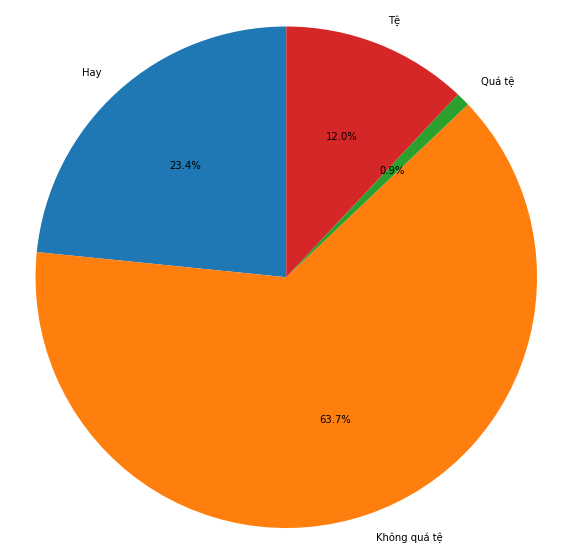

In [17]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10)
ax1.pie(dftmp.groupby(['category']).count()['rating'].tolist(), labels=dftmp.groupby(['category']).count().index.to_list(), autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### <u>PLOT 2:</u> Phân bố rating

In [18]:
dftmp.groupby(['rating']).count()

,category
rating,
1.1,1
1.4,2
2.2,1
2.5,3
2.8,2
...,...
8.3,1
8.4,2
8.5,2


In [19]:
y = dftmp.groupby(['rating'])['category'].count().tolist()
x = dftmp.groupby(['rating']).count().index.to_list()

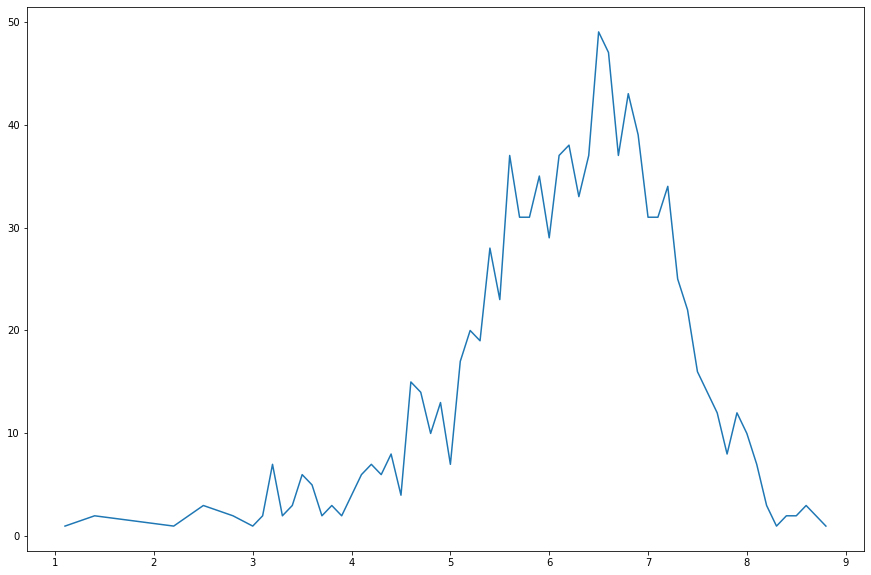

In [20]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,10)
ax1.plot(x, y)
plt.show()

### <u>PLOT 3:</u> Số lượng phim theo năm

In [21]:
dftmp = df[df.year.notnull()][['tconst', 'year']]
dftmp

,tconst,year
0,tt2077677,2012.0
1,tt0106332,1993.0
2,tt0116421,1996.0
3,tt3170832,2015.0
4,tt0204175,2000.0
...,...,...
995,tt2083231,2013.0
996,tt2158531,2013.0
997,tt0079945,1979.0
998,tt1653649,2010.0


In [22]:
y = dftmp.groupby(['year'])['tconst'].count().tolist()
x = dftmp.groupby(['year']).count().index.to_list()

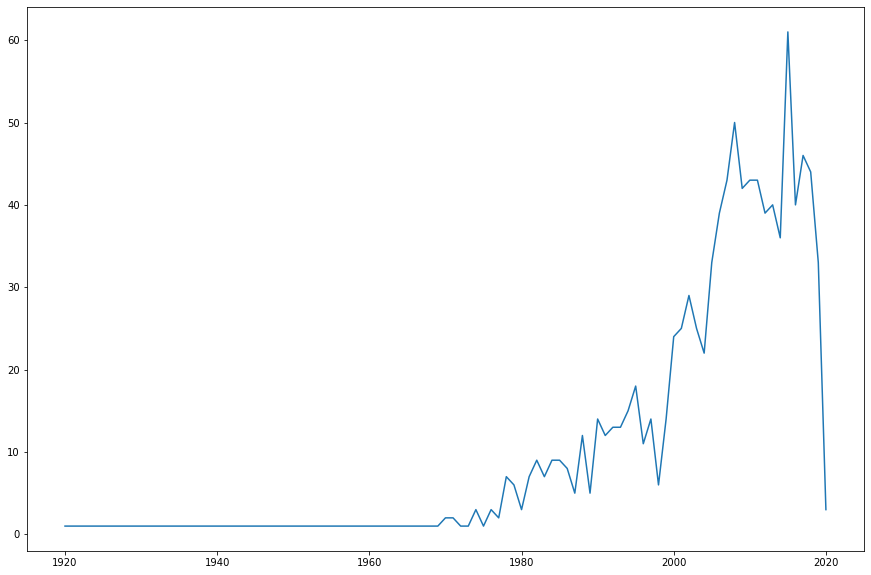

In [23]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,10)
ax1.plot(x, y)
plt.show()

### <u>PLOT 4:</u> Số lượng phim mỗi thể loại

In [24]:
dftmp=df[df.genres.notnull()]['genres'].tolist()
lg = dict()
for genres in dftmp:
    genre_split = genres.split(',')
    for genre in genre_split:
        if genre in lg.keys():
            lg[genre]+=1
        else:
            lg[genre]=1
genres=list(lg.keys())
dftmp=pd.DataFrame(columns=["genre", "count"])
for idx, genre in enumerate(genres):
    dftmp.loc[idx] = [genre, lg[genre]]
dftmp=dftmp.sort_values(by=['count'])
dftmp

,genre,count
20,Western,4
16,Musical,12
15,Sport,16
18,Animation,20
7,War,22
14,Documentary,24
19,History,35
2,Music,38
10,Sci-Fi,48
17,Biography,59


In [25]:
y = dftmp['genre'].to_list()
x = dftmp['count'].to_list()

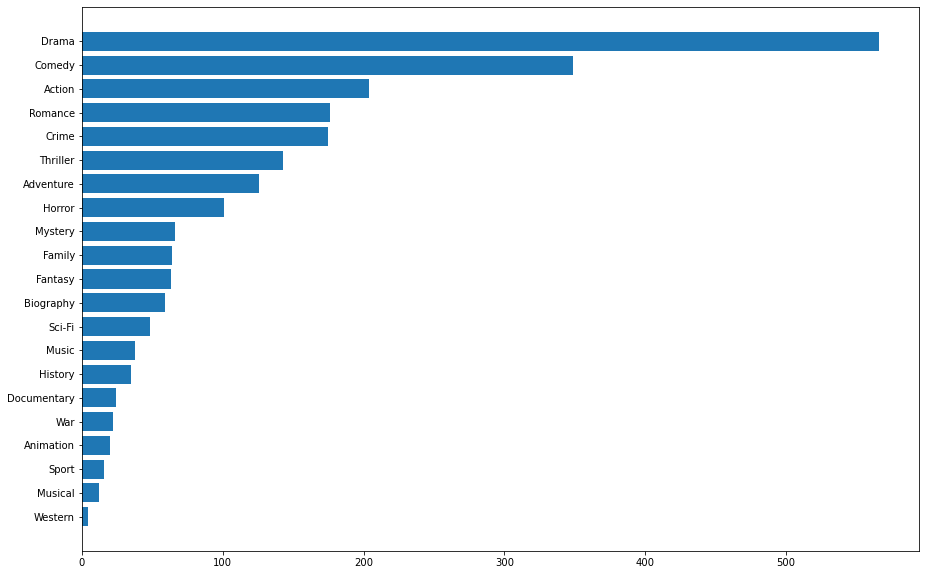

In [26]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,10)
ax1.barh(y, x)
plt.show()

### <u>PLOT 5:</u> Rating trung bình mỗi thể loại

In [27]:
df.head()

,tconst,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,tt2077677,3Simoa,2012.0,6.4,370,"A caper comedy about two friends, Simo and Las...",Comedy,Finland,Finnish,334784.0,93296,86,Teemu Nikki,"Olli Rahkonen,Paula Vesala,Rami Rusinen"
1,tt0106332,Ba wang bie ji,1993.0,8.1,24830,"""Farewell, My Concubine"" is a movie with two p...","Drama,Music,Romance","China,Hong Kong",Mandarin,4000000.0,5985074,171,Kaige Chen,"Fengyi Zhang,Leslie Cheung,Li Gong"
2,tt0116421,The Glimmer Man,1996.0,5.4,18687,"Jack Cole is a soft spoken, mystical, new age ...","Action,Comedy,Crime",USA,"Chinese,English,Russian",45000000.0,20351264,91,John Gray,"Bob Gunton,Keenen Ivory Wayans,Steven Seagal"
3,tt3170832,Room,2015.0,8.1,365849,"ROOM tells the extraordinary story of Jack, a ...","Drama,Thriller","Canada,Ireland,UK,USA",English,13000000.0,35401758,118,Lenny Abrahamson,"Brie Larson,Jacob Tremblay,Sean Bridgers"
4,tt0204175,Boys and Girls,2000.0,5.4,15942,"Jennifer and Ryan are students at UC Berkeley,...","Comedy,Drama,Romance",USA,English,35000000.0,25850615,94,Robert Iscove,"Brendon Ryan Barrett,Claire Forlani,Freddie Pr..."


In [28]:
dftmp=df[df.rating.notnull()][df.genres.notnull()][['rating','genres']]
dftmp

,rating,genres
0,6.4,Comedy
1,8.1,"Drama,Music,Romance"
2,5.4,"Action,Comedy,Crime"
3,8.1,"Drama,Thriller"
4,5.4,"Comedy,Drama,Romance"
...,...,...
995,5.1,"Action,Crime,Thriller"
996,6.6,"Comedy,Horror"
997,6.4,"Adventure,Mystery,Sci-Fi"
998,6.5,"Action,Drama"


In [29]:
genres_score_dict=dict()
genres_count_dict=dict()
for genre in genres:
    genres_score_dict[genre] = round(dftmp[dftmp.genres.str.contains(genre)]['rating'].mean(), 4)
for genre in genres:
    genres_count_dict[genre] = dftmp[dftmp.genres.str.contains(genre)]['rating'].count()
dftmp=pd.DataFrame(columns=["genre", "avg. rating", "count"])
for idx, genre in enumerate(genres):
    dftmp.loc[idx] = [genre, genres_score_dict[genre], genres_count_dict[genre]]
dftmp=dftmp.sort_values(by=['avg. rating'])
dftmp

,genre,avg. rating,count
20,Western,5.3500,4
9,Horror,5.6881,101
0,Comedy,5.9020,349
12,Family,5.9156,64
10,Sci-Fi,5.9167,48
4,Action,6.0588,204
8,Fantasy,6.0778,63
6,Thriller,6.1154,143
3,Romance,6.1318,176
13,Mystery,6.1364,66


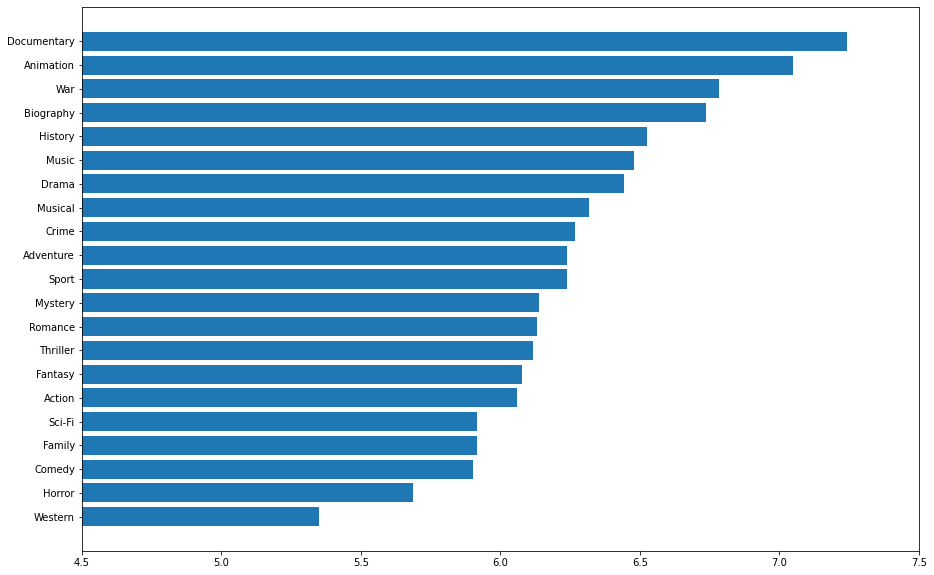

In [30]:
y = dftmp['genre'].to_list()
x = dftmp['avg. rating'].to_list()
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,10)
ax1.barh(y, x)
plt.xlim([4.5,7.5])
plt.show()

### <u>PLOT 6</u>: Doanh thu trung bình theo năm

In [31]:
dftmp=df[df.gross.notnull()][['gross', 'year']]
dftmp

,gross,year
0,93296,2012.0
1,5985074,1993.0
2,20351264,1996.0
3,35401758,2015.0
4,25850615,2000.0
...,...,...
995,189739,2013.0
996,41537,2013.0
997,82604699,1979.0
998,1838858,2010.0


<AxesSubplot:ylabel='Frequency'>

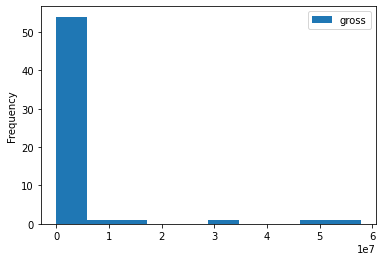

In [32]:
dftmp.groupby('year').min().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

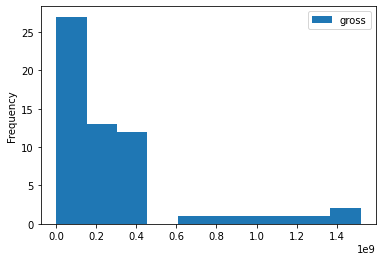

In [33]:
dftmp.groupby('year').max().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

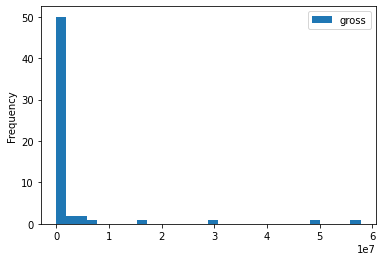

In [34]:
dftmp.groupby('year').min().plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

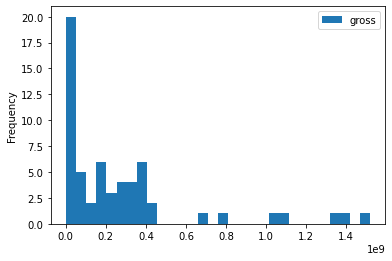

In [35]:
dftmp.groupby('year').max().plot(kind='hist', bins=30)

<AxesSubplot:xlabel='year'>

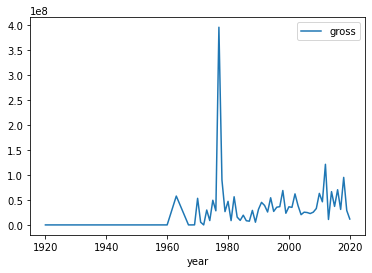

In [36]:
dftmp.groupby('year').mean().plot(kind='line')

### <u>PLOT 7</u>: TOP 5 quốc gia theo số lượng phim

In [37]:
dftmp=df[df.country.notnull()][['country']]
country_list=[]
for ctr in dftmp.country.to_list():
    for c in ctr.split(','):
        country_list.append(c)
country_list=list(set(country_list))
country_count_dict=dict()
for c in country_list:
    country_count_dict[c]=dftmp[dftmp.country.str.contains(c)].shape[0]
country_count_dict

{'Romania': 11,
 'Cambodia': 1,
 'Netherlands': 14,
 'China': 31,
 'Peru': 2,
 'Morocco': 2,
 'Latvia': 3,
 'Hungary': 13,
 'Australia': 21,
 'Egypt': 6,
 'Taiwan': 3,
 'Switzerland': 9,
 'Brazil': 12,
 'France': 108,
 'Bosnia and Herzegovina': 1,
 'Republic of North Macedonia': 1,
 'Philippines': 2,
 'Pakistan': 1,
 'Ukraine': 5,
 'South Korea': 11,
 'India': 42,
 'Malaysia': 2,
 'Qatar': 1,
 'Venezuela': 2,
 'Estonia': 3,
 'Sweden': 17,
 'Iceland': 11,
 'Canada': 65,
 'Singapore': 5,
 'Chile': 2,
 'UK': 135,
 'Uruguay': 2,
 'USA': 534,
 'Greece': 1,
 'Kazakhstan': 1,
 'Argentina': 11,
 'Turkey': 13,
 'Thailand': 2,
 'Finland': 28,
 'United Arab Emirates': 4,
 'Bulgaria': 5,
 'Russia': 20,
 'Soviet Union': 1,
 'Dominican Republic': 2,
 'Slovakia': 5,
 'Ireland': 9,
 'Lithuania': 1,
 'Czech Republic': 10,
 'Israel': 2,
 'New Zealand': 3,
 'Italy': 38,
 'Norway': 20,
 'Isle Of Man': 1,
 'Poland': 4,
 'Spain': 33,
 'South Africa': 9,
 'Bolivia': 1,
 'Luxembourg': 5,
 'Cuba': 2,
 'Indones

In [38]:
dftmp=pd.DataFrame(columns=["country", "count"])
for idx, c in enumerate(country_list):
    dftmp.loc[idx] = [c, country_count_dict[c]]
dftmp.sort_values(by="count", ascending=False, inplace=True)
dftmp

,country,count
32,USA,534
30,UK,135
13,France,108
75,Germany,91
27,Canada,65
...,...,...
17,Pakistan,1
60,Serbia,1
59,Indonesia,1
42,Soviet Union,1


<AxesSubplot:xlabel='country'>

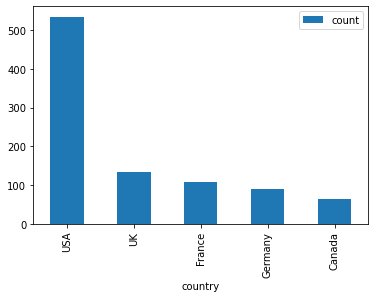

In [39]:
dftmp[:5].plot(kind='bar', x="country",y="count")

### <u>PLOT 8</u>: TOP 10 phim được đánh giá cao nhất (toàn thế giới)


In [40]:
df[df.rating_count.notnull()][['rating_count']].describe()

,rating_count
count,1.000000e+03
mean,4.794315e+04
std,1.369032e+05
min,6.000000e+00
25%,7.932500e+02
50%,6.202500e+03
75%,3.524400e+04
max,1.836256e+06


In [41]:
dftmp=df[df.rating.notnull()][df['rating_count'] >= 500000][['tconst', 'name', 'year', 'rating', 'rating_count']]
dftmp.sort_values(by=['rating','rating_count'], ascending=[False, True], inplace=True)
dftmp[:10]

,tconst,name,year,rating,rating_count
256,tt0137523,Fight Club,1999.0,8.8,1836256
596,tt0076759,Star Wars,1977.0,8.6,1219843
235,tt0102926,The Silence of the Lambs,1991.0,8.6,1257236
198,tt0114814,The Usual Suspects,1995.0,8.5,982719
801,tt1345836,The Dark Knight Rises,2012.0,8.4,1502247
560,tt0264464,Catch Me If You Can,2002.0,8.1,818050
847,tt0378194,Kill Bill: Vol. 2,2004.0,8.0,678084
239,tt0848228,The Avengers,2012.0,8.0,1252485
445,tt0796366,Star Trek,2009.0,7.9,575035
367,tt0181689,Minority Report,2002.0,7.6,504613


In [42]:
dftmp=df[df.rating.notnull()][df.country.notnull()][df.country.str.contains('USA', na=False)][['tconst', 'name', 'year', 'rating', 'rating_count']]
dftmp.sort_values(by=['rating','rating_count'], ascending=[False, True], inplace=True)
dftmp[:10]

,tconst,name,year,rating,rating_count
256,tt0137523,Fight Club,1999.0,8.8,1836256
156,tt0088178,Stop Making Sense,1984.0,8.6,13019
596,tt0076759,Star Wars,1977.0,8.6,1219843
235,tt0102926,The Silence of the Lambs,1991.0,8.6,1257236
198,tt0114814,The Usual Suspects,1995.0,8.5,982719
801,tt1345836,The Dark Knight Rises,2012.0,8.4,1502247
313,tt0112641,Casino,1995.0,8.2,461377
254,tt0074958,Network,1976.0,8.1,143898
569,tt0077416,The Deer Hunter,1978.0,8.1,308804
3,tt3170832,Room,2015.0,8.1,365849


### <u>PLOT 9</u>: 

In [43]:
df.head()

,tconst,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,tt2077677,3Simoa,2012.0,6.4,370,"A caper comedy about two friends, Simo and Las...",Comedy,Finland,Finnish,334784.0,93296,86,Teemu Nikki,"Olli Rahkonen,Paula Vesala,Rami Rusinen"
1,tt0106332,Ba wang bie ji,1993.0,8.1,24830,"""Farewell, My Concubine"" is a movie with two p...","Drama,Music,Romance","China,Hong Kong",Mandarin,4000000.0,5985074,171,Kaige Chen,"Fengyi Zhang,Leslie Cheung,Li Gong"
2,tt0116421,The Glimmer Man,1996.0,5.4,18687,"Jack Cole is a soft spoken, mystical, new age ...","Action,Comedy,Crime",USA,"Chinese,English,Russian",45000000.0,20351264,91,John Gray,"Bob Gunton,Keenen Ivory Wayans,Steven Seagal"
3,tt3170832,Room,2015.0,8.1,365849,"ROOM tells the extraordinary story of Jack, a ...","Drama,Thriller","Canada,Ireland,UK,USA",English,13000000.0,35401758,118,Lenny Abrahamson,"Brie Larson,Jacob Tremblay,Sean Bridgers"
4,tt0204175,Boys and Girls,2000.0,5.4,15942,"Jennifer and Ryan are students at UC Berkeley,...","Comedy,Drama,Romance",USA,English,35000000.0,25850615,94,Robert Iscove,"Brendon Ryan Barrett,Claire Forlani,Freddie Pr..."


In [44]:
dftmp=df[df.runtime.notnull()][df.year.notnull()][['year', 'runtime']]
dftmp.head()

,year,runtime
0,2012.0,86
1,1993.0,171
2,1996.0,91
3,2015.0,118
4,2000.0,94


In [45]:
dftmp=dftmp[dftmp.year >= 2000][dftmp.year<=2020]
dftmp.year=dftmp.year.apply(lambda x: int(x))

/home/nguyenminhdang/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='year'>

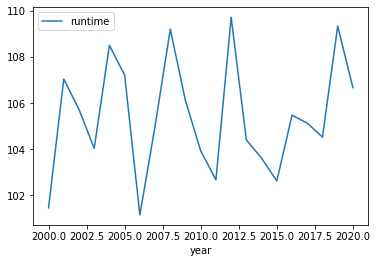

In [46]:
dftmp.groupby('year').mean().plot(kind='line', )